<h1 style="font-size:40px;">Data Science Assignment for Wolt - Linda Kowalik</h1>

<h2 style="font-size:30px;">Import libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="font-size:30px;">Load dataset</h2>

In [2]:
df = pd.read_csv('dataset_for_datascience_assignment.csv', parse_dates=['REGISTRATION_DATE', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY'])

<h2 style="font-size:30px;">Initial peek at the dataset</h2>

In [3]:
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   USER_ID                                  21983 non-null  int64         
 8   BREAKFAST_PURCHASES                      12028 non-null  float64       
 9   LUNCH_PURCHASES                        

In [5]:
df.describe()

,REGISTRATION_DATE,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983,21983.000000,12028.000000,12028.000000,11964,12027,21983.00000,12028.000000,12028.000000,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,2019-09-15 11:16:32.239457536,3.345358,5.741686,0.372464,2019-11-22 22:09:08.846539520,2020-04-18 23:06:28.825143296,10992.00000,0.193964,2.375042,0.493432,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
min,2019-09-01 00:00:00,0.000000,0.000000,0.000000,2019-09-01 00:00:00,2019-09-01 00:00:00,1.00000,0.000000,0.000000,0.000000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,2019-09-08 00:00:00,0.000000,1.000000,0.000000,2019-09-14 00:00:00,2019-10-11 00:00:00,5496.50000,0.000000,0.000000,0.000000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,2019-09-15 00:00:00,1.000000,2.000000,0.000000,2019-09-26 00:00:00,2020-05-22 00:00:00,10992.00000,0.000000,1.000000,0.000000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,2019-09-22 00:00:00,3.000000,6.000000,0.000000,2019-12-30 00:00:00,2020-09-27 00:00:00,16487.50000,0.000000,2.000000,0.000000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,2019-09-30 00:00:00,320.000000,320.000000,44.000000,2020-10-31 00:00:00,2020-10-31 00:00:00,21983.00000,52.000000,171.000000,71.000000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000
std,NaN,8.523171,10.536220,1.416310,NaN,NaN,6346.08982,1.104067,5.626178,1.827710,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263


<h2 style="font-size:30px;">Exploring the data</h2>

<h3 style="font-size:25px;">User Activation</h3>

User Activation occurs when a new user takes a desired action that takes them to the next step in the customer journey, typically after engagement (such as browsing or signing up) and before retention (becoming a loyal customer). For this analysis, I define User Activation as registered users making their first purchase.

For Wolt, increasing User Activation is a strong indicator that users recognize the value of the product or service, increasing the likelihood of long-term engagement and repeat purchases.

<b>Total Activated Users</b> represents the total number of users who have successfully completed their first purchase. A higher number of activated users suggests effective user onboarding and compelling incentives that encourage users to transact.

<b>Activation Rate</b> is the percentage of registered users who made their first purchase. It measures how effectively a business converts sign-ups into paying customers. A high Activation Rate typically correlates with strong user experience, effective onboarding strategies, and clear value communication.

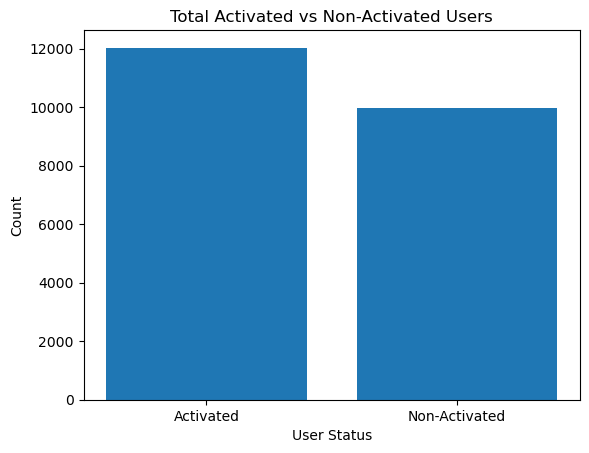

Total Activated: 12028
Total Non-Activated: 9955
Activation Rate: 54.72%


In [14]:
# Create new column 'is_active' and populate: 1 if PURCHASE_COUNT >= 1, else 0
df['is_active'] = (df['PURCHASE_COUNT'] >= 1).astype(int)

# Calculate total activated and non-activated by counting rows of the the filtered dataframe 
total_activated = df[df['is_active'] == 1].shape[0]
total_non_activated = df[df['is_active'] == 0].shape[0]

# Calculate activation rate
activation_rate = total_activated / (total_activated + total_non_activated)

# Bar plot
plt.bar(["Activated", "Non-Activated"], [total_activated, total_non_activated])
plt.xlabel("User Status")
plt.ylabel("Count")
plt.title("Total Activated vs Non-Activated Users")

# Show plot
plt.show()

# Print values
print(f'Total Activated: {total_activated:}')
print(f'Total Non-Activated: {total_non_activated:}')
print(f'Activation Rate: {activation_rate:.2%}')

<b>Activation Velocity</b> describes how long it takes for users to reach an activation milestone - in this case their first purchase. This metric helps understand the speed at which users transition to paying customers. 

<b>Why does Activation Velocity matter?</b> Activation Velocity is a crucial metric because it directly impacts customer purchasing behavior and long-term engagement. As illustrated in the scatterplot below, there is a negative correlation between Activation Velocity (Days) and the Total Number of Purchases. This means that customers who make their first purchase quickly after registering tend to make more purchases over time compared to those who take longer to activate.

Average Activation Velocity: 68.41 days
Median Activation Velocity: 1.00 days
Mode Activation Velocity: 0.00 days


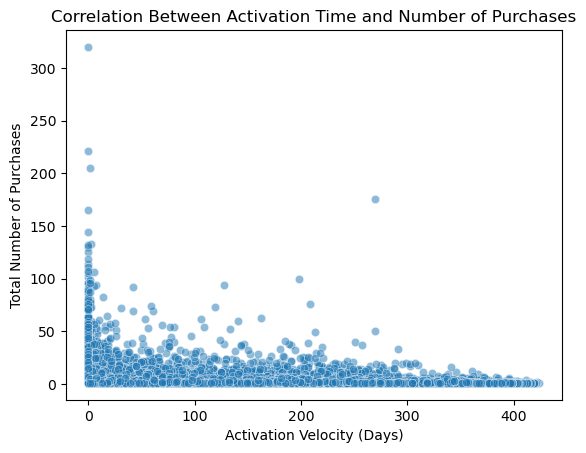

In [7]:
# Create copy of original dataframe that only contains records of activated customers (meaning, customers with at least one purchase)
activated_users = df.dropna(subset=['FIRST_PURCHASE_DAY']).copy()

# Calculate the number of days between a users activation date and their first purchase date
activated_users['days_to_activate'] = (activated_users['FIRST_PURCHASE_DAY'] - activated_users['REGISTRATION_DATE']).dt.days


# Activation Velocity Statistics
average_activation_velocity = activated_users['days_to_activate'].mean() # average
median_activation_velocity = activated_users['days_to_activate'].median() # 50th percentile
mode_activation_velocity = activated_users['days_to_activate'].mode()[0] # most frequent value

print(f'Average Activation Velocity: {average_activation_velocity:.2f} days')
print(f'Median Activation Velocity: {median_activation_velocity:.2f} days')
print(f'Mode Activation Velocity: {mode_activation_velocity:.2f} days')

# --- Correlation Between Activation Time and Number of Purchases ---
sns.scatterplot(x=activated_users['days_to_activate'], y=activated_users['PURCHASE_COUNT'], alpha=0.5)
plt.title('Correlation Between Activation Time and Number of Purchases')
plt.xlabel('Activation Velocity (Days)')
plt.ylabel('Total Number of Purchases')
plt.show()

While statistical metrics on Activation Velocity are interesting we can see that the data is skewed to the right with the average at 68.41 Days while the Median is 1 Day and the Mode 0 Days. The average doesn't accurately represent the typical activation time, while the Median and Mode are so low that tracking improvements will be hard. Therefore an alternative Activation Velocity metric might be a better fit:

<b>X Day Activation Rate</b> refers to the Activation Rate within a set number of days (for example, 0 days, 1 day, 2 days, 7 days, etc.). This metric allows to focus on the speed or efficiency of activations over a specific timeframe, without being skewed by outliers. It gives a more targeted, actionable, and realistic picture of activation efficiency. Using this metric provides a clearer benchmark for performance. This will help Wolt stay aligned with its operational goals.

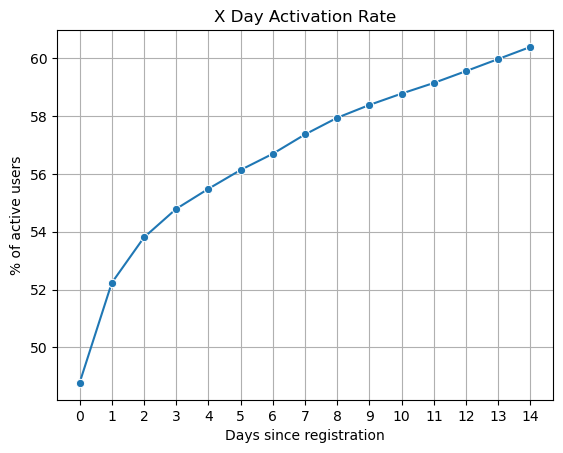

0-Day Activation Rate: 48.77%
1-Day Activation Rate: 52.23%
2-Day Activation Rate: 53.80%
7-Day Activation Rate: 57.36%


In [24]:
# Activation within 14 days of registration
activation_days = list(range(15))
activation_counts = activated_users['days_to_activate'].value_counts().reindex(activation_days, fill_value=0)
activation_percentages = (activation_counts / len(activated_users)) * 100
activation_cumulative = activation_percentages.cumsum()

# Cumulative Activation Plot
sns.lineplot(x=activation_days, y=activation_cumulative, marker='o')
plt.title('X Day Activation Rate')
plt.xlabel('Days since registration')
plt.ylabel('% of active users')
plt.xticks(activation_days)
plt.grid(True)
plt.show()

# print 0, 1, 2 and 7 Day Activation Rate
for day in [0, 1, 2, 7]:
    rate = activation_cumulative[day]
    print(f"{day}-Day Activation Rate: {rate:.2f}%")


<h3 style="font-size:25px;">Customer Retention</h3>

Customer Retention refers to a company's ability to turn customers into repeat customers

<b>Repeat Customer Rate</b> is a popular customer retention metric. It measures the percentage of customers who have made two or more purchases. 

For Wolt, Repeat Customers are important as it reflects customer loyalty and satisfaction. Increasing Repeat Customers would mean satisfied customers as well as improving cost efficiency for Wolt, as retaining customers is typically cheaper than acquiring new ones. 

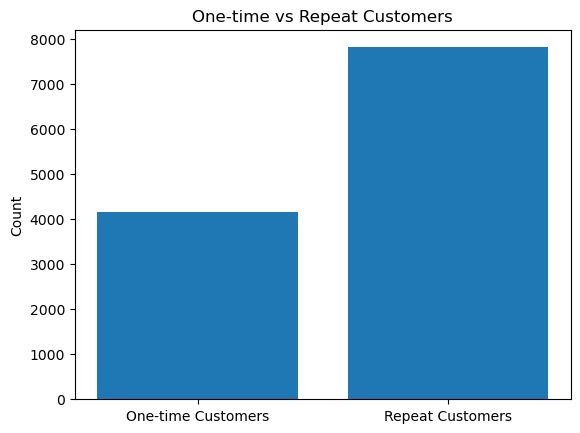

Total One-time Customers: 4150
Total Repeat Customers: 7814
Repeat Customer Rate: 65.31%


In [26]:
# calculate repeat customers and one time customers by counting rows of the filtered dataframe
repeat_customers = activated_users[activated_users['PURCHASE_COUNT'] > 1].shape[0]
one_time_customers = activated_users[activated_users['PURCHASE_COUNT'] == 1].shape[0]

# calculate repeat customer rate
repeat_customer_rate = repeat_customers / (repeat_customers + one_time_customers)

# visualize count of one-time-customers and repeat customers 
plt.bar(['One-time Customers', 'Repeat Customers'], [one_time_customers, repeat_customers])
plt.title('One-time vs Repeat Customers')
plt.ylabel('Count')
plt.show()

# print values
print(f'Total One-time Customers: {one_time_customers:}')
print(f'Total Repeat Customers: {repeat_customers:}')
print(f'Repeat Customer Rate: {repeat_customer_rate:.2%}')

<h3 style="font-size:25px;">Customer Churn</h3>

Customer Churn is when customers stop using a product/service and therefore stop being customers. It is measured using the Churn Rate.

<b>Churn Rate</b> is a calculation that shows the percentage of customers that are leaving in a given time period. It is calculated by dividing the number of customers lost in a period by the total number of customers at the beginning of that period. For this analysis I will consider customers as churned if their last purchase is over 365 days ago.

For Wolt, tracking the churn rate is important to know how well the company retains customers, which is an indicator for the quality and usefulness of the service to customers. A lower Churn Rate typically means more satisfied customers and leads to higher revenue.

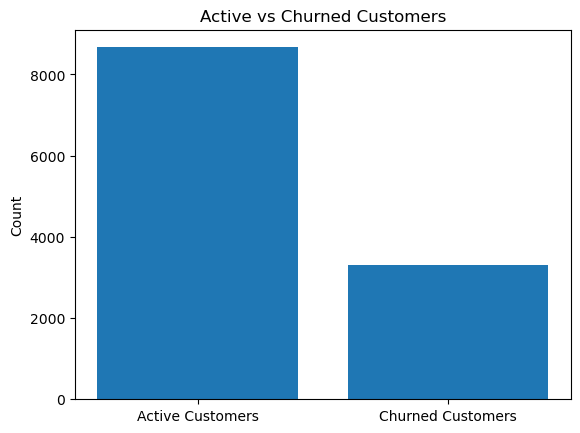

Total Active: 8669
Total Churned: 3295
Churn Rate: 27.54%


In [20]:
# Calculate the number of days since the last purchase
# Since Oct 31 2020 is the dataset end date, days since last purchase is the difference between this date and the last purchase date in days
from datetime import datetime
dataset_end_date = datetime(2020,10,31)
activated_users['days_since_last_purchase'] = (dataset_end_date - activated_users['LAST_PURCHASE_DAY']).dt.days

# Calculate total churned and total active customers by counting rows of the the filtered dataframe 
total_churned = activated_users[activated_users['days_since_last_purchase'] > 365].shape[0]
total_active = activated_users[activated_users['days_since_last_purchase'] <= 365].shape[0]

# calculate churn rate
churn_rate = total_churned / (total_churned + total_active)

# visualize count of churned and active customers with bar chart
plt.bar(['Active Customers', 'Churned Customers'], [total_active, total_churned])
plt.title('Active vs Churned Customers')
plt.ylabel('Count')
plt.show()

# print values
print(f'Total Active: {total_active:}')
print(f'Total Churned: {total_churned:}')
print(f'Churn Rate: {churn_rate:.2%}')